In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
cd C:\python related\fastai

C:\python related\fastai


In [3]:
from fastai.conv_learner import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
arch=resnext101_64

In [5]:
PATH ="C:/Users/admin/Desktop/45_top_type/"  

In [6]:
label_csv= f'{PATH}labels.csv'
n=len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [7]:
def get_data(sz,bs):
    tfms=tfms_from_model(arch, sz, aug_tfms=transforms_top_down,max_zoom=1.1)
    data=ImageClassifierData.from_csv(PATH,'train',f'{PATH}labels.csv',test_name='test',num_workers=4,
                                  val_idxs=val_idxs,suffix='.jpg',tfms=tfms,bs=bs)
    return data if sz>300 else data.resize(340,'tmp')

In [8]:
data = get_data(128,10)
learn = ConvLearner.pretrained(arch,data,precompute=True)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [9]:
learn.fit(0.01,7)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.628602   0.466292   0.807759  
    1      0.559928   0.386182   0.862069                                      
    2      0.445367   0.271719   0.905172                                      
    3      0.419981   0.325388   0.866379                                      
    4      0.429102   0.346447   0.847414                                      
    5      0.339351   0.290035   0.903448                                      
    6      0.334879   0.250591   0.917241                                      



[0.2505913, 0.917241369855815]

In [9]:
learn.precompute=False

In [11]:
learn.fit(0.01,4,cycle_len=2,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=30), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.482183   0.400144   0.846552  
    1      0.46799    0.317057   0.839655                                      
    2      0.476055   0.315067   0.858621                                      
    3      0.381472   0.276332   0.882759                                      
    4      0.315325   0.243264   0.889655                                      
    5      0.33354    0.252344   0.875862                                      
    6      0.396874   0.230841   0.906897                                      
    7      0.415273   0.353557   0.858621                                      
    8      0.446379   0.266421   0.874138                                      
    9      0.362536   0.19808    0.910345                                      
    10     0.335186   0.257165   0.871552                                      
    11     0.290537   0.216492   0.906897                                   

[0.25199422, 0.8879310344827587]

In [25]:
learn.save('45_top_type_res101')

In [10]:
learn.load('45_top_type_res101')

In [12]:
learn.fit(0.01,1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.346673   0.347921   0.85      



[0.34792128, 0.8499999930118692]

In [12]:
lr=0.01
lrs= np.array([lr/9,lr/3,lr])
learn.unfreeze()

In [14]:
learn.fit(lrs,2,cycle_len=2,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.588491   0.394538   0.823276  
    1      0.36768    0.34339    0.817241                                      
    2      0.428142   0.354616   0.823276                                      
    3      0.321839   0.214787   0.901724                                      
    4      0.266853   0.206205   0.900862                                      
    5      0.208319   0.168504   0.930172                                      



[0.16850354, 0.9301724084492388]

In [15]:
learn.save('45_top_type_res101')

In [16]:
learn.load('45_top_type_res101')

In [17]:
learn.fit(lrs,2,cycle_len=2,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.317594   0.1931     0.924138  
    1      0.195558   0.206457   0.948276                                      
    2      0.219324   0.147072   0.937931                                      
    3      0.256365   0.315498   0.906034                                      
    4      0.17285    0.178211   0.92069                                       
    5      0.185523   0.185421   0.941379                                      



[0.18542115, 0.9413793025345638]

In [18]:
learn.save('45_top_type_res101')

In [23]:
learn.load('45_top_type_res101')

In [24]:
learn.unfreeze()
learn.fit(lrs,3,cycle_len=2,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.191703   0.355906   0.913793  
    1      0.171893   0.210606   0.944828                                      
    2      0.208725   0.131832   0.972414                                      
    3      0.138702   0.197784   0.934483                                      
    4      0.10386    0.09447    0.965517                                      
    5      0.112073   0.116053   0.965517                                      
    6      0.187845   0.469442   0.906897                                      
    7      0.281551   0.281036   0.941379                                      
    8      0.179707   0.459315   0.883621                                      
    9      0.173411   0.263103   0.939655                                      
    10     0.1673     0.101688   0.965517                                      
    11     0.10099    0.213706   0.958621                                   

[0.11760617, 0.9655172352133126]

In [25]:
learn.freeze()
learn.fit(lr,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.109934   0.088193   0.965517  
    1      0.072347   0.090646   0.955172                                      
    2      0.072972   0.072743   0.965517                                      



[0.072742715, 0.9655172352133126]

In [27]:
learn.save('45_top_type_res101')

In [28]:
learn.load('45_top_type_res101')

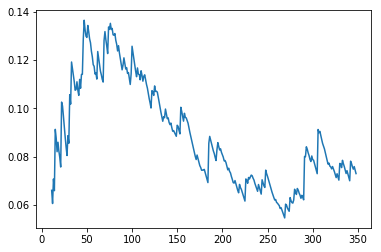

In [29]:
learn.sched.plot_loss()

In [30]:
learn.set_data(get_data(256,10))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [32]:
learn.fit(lr,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.20346    0.144043   0.950862  
    1      0.158202   0.10733    0.961207                                      
    2      0.185755   0.107645   0.95431                                       
    3      0.208035   0.128038   0.943103                                      
    4      0.130625   0.151069   0.937069                                      



[0.15106912, 0.9370689597623102]

In [33]:
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.167913   0.115088   0.950862  
    1      0.163978   0.109163   0.957759                                      
    2      0.128777   0.131606   0.943966                                      
    3      0.128722   0.121952   0.940517                                      
    4      0.158979   0.11601    0.950862                                      
    5      0.149427   0.113197   0.95431                                       
    6      0.113621   0.129657   0.943966                                      



[0.12965715, 0.9439655131307142]

In [14]:
lr=0.01
lrs= np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs,3,cycle_len=2,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.270569   0.259254   0.937931  
    1      0.158828   0.214913   0.926724                                      
    2      0.206411   0.244105   0.913793                                      
    3      0.112024   0.095298   0.972414                                      
    4      0.101664   0.087954   0.975862                                      
    5      0.049769   0.061661   0.993103                                      
    6      0.108986   0.184105   0.948276                                      
    7      0.10588    0.057175   0.986207                                      
    8      0.094368   0.084045   0.968966                                      
    9      0.085793   0.10743    0.951724                                      
    10     0.053355   0.056391   0.975862                                      
    11     0.054112   0.090117   0.968966                                   

[0.087317355, 0.9724137885817166]

In [15]:
learn.save('45_top_type_res101')

In [16]:
learn.load('45_top_type_res101')

In [17]:
learn.freeze()
learn.fit(lr,3,cycle_len=2,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.089935   0.098986   0.965517  
    1      0.107087   0.076226   0.97931                                       
    2      0.066882   0.132249   0.948276                                      
    3      0.139627   0.120075   0.948276                                      
    4      0.049924   0.058664   0.982759                                      
    5      0.03919    0.057429   0.982759                                      
    6      0.0632     0.097951   0.972414                                      
    7      0.045141   0.06588    0.982759                                      
    8      0.045554   0.104196   0.965517                                      
    9      0.035712   0.080506   0.975862                                      
    10     0.043357   0.142753   0.951724                                      
    11     0.036218   0.078694   0.97931                                    

[0.10531314, 0.9689655118975146]

In [14]:
learn.set_data(get_data(500,10))

In [19]:
learn.fit(lr,3,cycle_len=2,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                      
    0      0.528195   0.251474   0.891379  
    1      0.399549   0.239978   0.884483                                      
    2      0.350166   0.293276   0.862069                                      
    3      0.365406   0.196633   0.924138                                      
    4      0.272728   0.140844   0.962069                                      
    5      0.298096   0.192211   0.916379                                      
    6      0.290679   0.170018   0.924138                                      
    7      0.32606    0.152905   0.951724                                      
    8      0.265032   0.191672   0.937931                                      
    9      0.230755   0.179716   0.927586                                      
    10     0.251049   0.149513   0.943966                                      
    11     0.220731   0.148082   0.941379                                   

[0.12612024, 0.9586206859555738]

In [20]:
learn.save('45_top_type_res101')

In [10]:
learn.load('45_top_type_res101')

In [16]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

accuracy_np(probs,y)

0.9861111111111112

In [17]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[154   2]
 [  2 130]]


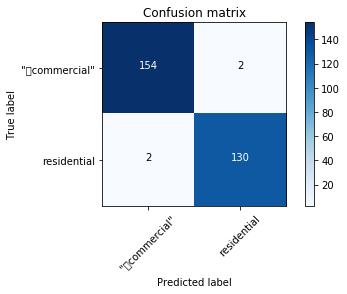

In [18]:
plot_confusion_matrix(cm, data.classes)

In [19]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most incorrect commercial


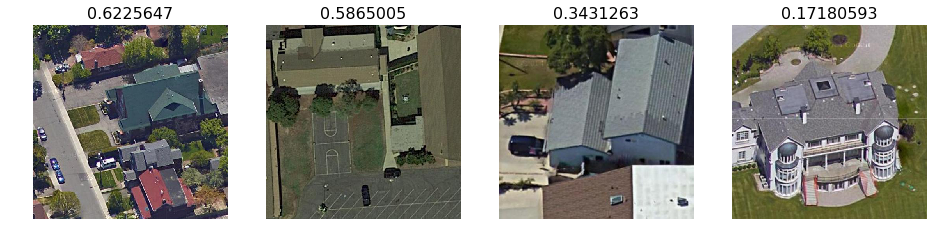

In [20]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect commercial")

Most incorrect residential


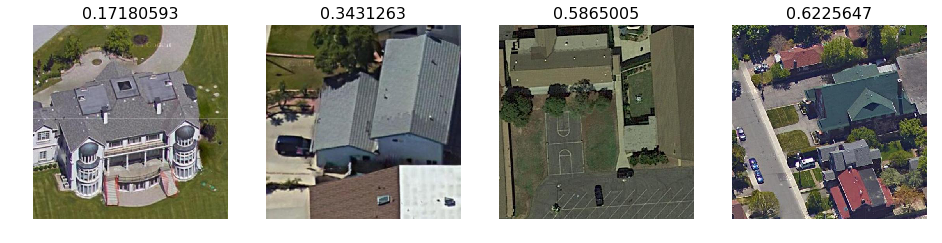

In [21]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect residential")

In [23]:
log_preds,y = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds),0)

In [25]:
ds = pd.DataFrame(probs)
ds.columns= data.classes

In [26]:
ds

,""" commercial""",residential
0,0.902050,0.097950
1,0.850643,0.149357
2,0.987090,0.012910
3,0.991447,0.008553
4,0.994624,0.005376
5,0.983077,0.016923
6,0.968204,0.031796
7,0.858709,0.141291
8,0.975068,0.024932
9,0.939735,0.060265


In [38]:
ds.insert(0,'id',[o[5:-4] for o in data.test_ds.fnames])

In [27]:
ds.to_csv("test_type_prediction.csv", encoding='utf-8',index=False)